# **Tiles Challenge**

**The Problem**

---
*Summary*

Create a function to place tiles of varying sizes into a given area

*Conditions*

1.   Need to be create a valid arrangement of tiles
2.   Arrangement should contain an element of randomess, so that multiple arrangements can be generated
3.   Function should take an area and a set of tiles as an arguement and return a valid arrangement
4.   Ideally create a visualisation of the arrangement





# Setup
---
Import the required packages

In [0]:
import pandas as pd 
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
from matplotlib import colors

# First Iteration
---
**For my first iteration I want to write a function that will fill an area with multiple coloured tiles of the same size. I should be able to pass in a dataframe of any number of tile types and get a pattern of tiles that do not have 2 of the same type of tile sharing an edge.**

Upon a quick Google search I found this: https://stackoverflow.com/questions/58770614/writing-an-algorithm-for-tiling-a-floor-using-python

Whilst this problem isn't exactly the same as the one I'm trying to solve I think it's a good starting point.

In [2]:
def place_tiles(room_length, room_width , tile_dim):
    placement = []

    num_of_tiles_per_row = int(room_length / tile_dim)
    num_of_tiles_per_col = int(room_width / tile_dim)
    prev_tile = None

    for c in range(num_of_tiles_per_col):
        cur_row_tiles = []


        for r in range(num_of_tiles_per_row):
            if prev_tile and prev_tile == "w":
                cur_row_tiles.append("b")
                prev_tile = "b"

            else:
                cur_row_tiles.append("w")
                prev_tile = "w"
        placement.append(cur_row_tiles)
        prev_tile = cur_row_tiles[0]
    return placement

place_tiles(10,10,1)

[['w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b'],
 ['b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w'],
 ['w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b'],
 ['b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w'],
 ['w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b'],
 ['b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w'],
 ['w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b'],
 ['b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w'],
 ['w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b'],
 ['b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w']]

Refactor the above function to take the tile length and width as separate arguements

In [3]:
def place_tiles(room_length, room_width , tile_length, tile_width):
    placement = []

    num_of_tiles_per_row = int(room_length / tile_length)
    num_of_tiles_per_col = int(room_width / tile_width)
    prev_tile = None

    for c in range(num_of_tiles_per_col):
        cur_row_tiles = []


        for r in range(num_of_tiles_per_row):
            if prev_tile and prev_tile == "w":
                cur_row_tiles.append("b")
                prev_tile = "b"

            else:
                cur_row_tiles.append("w")
                prev_tile = "w"
        placement.append(cur_row_tiles)
        prev_tile = cur_row_tiles[0]
    return placement

place_tiles(10,10,1,2)

[['w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b'],
 ['b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w'],
 ['w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b'],
 ['b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w'],
 ['w', 'b', 'w', 'b', 'w', 'b', 'w', 'b', 'w', 'b']]

This is pretty good but need to refactor so that it can take various tile types as an arguement.

First step is to rewrite this code to take white and black tiles of the same size as an argument and produce the same output as above.

Create a dataframe of different tiles

In [0]:
data = {'Tile_Label':  ['B','W'],
        'Tile_Length': [1,1],
        'Tile_Width': [2,2]}

df = pd.DataFrame (data, columns = ['Tile_Label','Tile_Length','Tile_Width'])

In [5]:
#Check data looks as expected
df.head()

,Tile_Label,Tile_Length,Tile_Width
0,B,1,2
1,W,1,2


In [0]:
def place_tiles(room_length, room_width , tiles):
    placement = []
    
    num_of_tiles_per_row = int(room_width / tiles["Tile_Width"].mean())
    num_of_tiles_per_col = int(room_length / tiles["Tile_Length"].mean())
    prev_tile = None

    for c in range(num_of_tiles_per_col):
        cur_row_tiles = []

        for r in range(num_of_tiles_per_row):
          if c == 0 and r == 0:
            rand = rnd.randint(0,len(tiles.index) - 1)
            cur_row_tiles.append(tiles["Tile_Label"][rand])
            prev_tile = tiles["Tile_Label"][rand]

          else:
            next_tile_index = (tiles.index[tiles["Tile_Label"] == prev_tile][0] + 1) % len(tiles.index)
            next_tile = tiles["Tile_Label"][next_tile_index]
            cur_row_tiles.append(next_tile)
            prev_tile = next_tile

        placement.append(cur_row_tiles)
        prev_tile = cur_row_tiles[0]
    return placement

In [7]:
place_tiles(10,10,df)

[['W', 'B', 'W', 'B', 'W'],
 ['B', 'W', 'B', 'W', 'B'],
 ['W', 'B', 'W', 'B', 'W'],
 ['B', 'W', 'B', 'W', 'B'],
 ['W', 'B', 'W', 'B', 'W'],
 ['B', 'W', 'B', 'W', 'B'],
 ['W', 'B', 'W', 'B', 'W'],
 ['B', 'W', 'B', 'W', 'B'],
 ['W', 'B', 'W', 'B', 'W'],
 ['B', 'W', 'B', 'W', 'B']]

Looks like this works! 

Lets test it with multiple tiles!

In [0]:
data = {'Tile_Label':  ['B','W','G','R'],
        'Tile_Length': [1,1,1,1],
        'Tile_Width': [2,2,2,2]}

df2 = pd.DataFrame (data, columns = ['Tile_Label','Tile_Length','Tile_Width'])

In [9]:
df2.head()

,Tile_Label,Tile_Length,Tile_Width
0,B,1,2
1,W,1,2
2,G,1,2
3,R,1,2


In [10]:
place_tiles(10,10,df2)

[['B', 'W', 'G', 'R', 'B'],
 ['W', 'G', 'R', 'B', 'W'],
 ['G', 'R', 'B', 'W', 'G'],
 ['R', 'B', 'W', 'G', 'R'],
 ['B', 'W', 'G', 'R', 'B'],
 ['W', 'G', 'R', 'B', 'W'],
 ['G', 'R', 'B', 'W', 'G'],
 ['R', 'B', 'W', 'G', 'R'],
 ['B', 'W', 'G', 'R', 'B'],
 ['W', 'G', 'R', 'B', 'W']]

**Happy days!!**

# Turning an array of tiles into an image
---
**It would be cool to be able to visualise the tile arrangement with colours.**

I like an array of tile configuration as an output but it'd be cool to show this visually!

I found this on stack overflow and reckon it will do the job. 

https://stackoverflow.com/questions/43971138/python-plotting-colored-grid-based-on-values

The goal is to build an function for which I can pass in an array of tiles and get a visual representation of the arrangement.

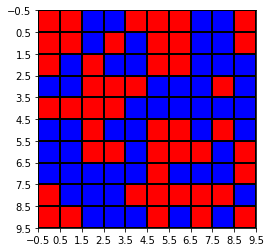

In [11]:
data = np.random.rand(10, 10) * 20

# create discrete colormap
cmap = colors.ListedColormap(['red', 'blue'])
bounds = [0,10,20]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
ax.imshow(data, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(-.5, 10, 1));
ax.set_yticks(np.arange(-.5, 10, 1));

plt.show()

I quite like this but need to make a few changes. It needs to take a tile arrangement as an arguement and create a custom colour map, it would also be good to get rid of the axis labels.

First lets add another column to our tiles dataframe so specify the colour that tile should be. I can use this as a lookup for the plotting function.

In [0]:
data = {'Tile_Label':  ['B','W','R'],
        'Tile_Length': [1,1,1],
        'Tile_Width': [1,1,1],
        'Tile_Colour':['black','white','red']}

df3 = pd.DataFrame (data, columns = ['Tile_Label','Tile_Length','Tile_Width','Tile_Colour'])

In [0]:
def colour_tiles(arrangement, tiles):
  #Create discrete colormap
  cmap = colors.ListedColormap(tiles["Tile_Colour"])
  bounds = tiles.index.to_list()
  bounds.append(len(tiles.index))
  norm = colors.BoundaryNorm(bounds, cmap.N)

  #Create a lookup dictionary to replace tile labels with numeric values
  lookup = dict(zip(tiles["Tile_Label"], tiles.index.to_list()))

  #Replace the tile labels with numbers
  data = []

  for line in arrangement:
    n_line = (pd.Series(line)).map(lookup)
    data.append(list(n_line))

  #Create the plot
  fig, ax = plt.subplots()
  ax.imshow(data, cmap=cmap, norm=norm)

  #Draw gridlines
  ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)

  #Will need this to read in length of data to set ticks
  ax.set_xticks(np.arange(-0.5, 10, 1));
  ax.set_yticks(np.arange(-0.5, 10, 1));

  #Hide Tick Labels
  ax.set_xticklabels([]);
  ax.set_yticklabels([]);

  #Show plot
  plt.show()

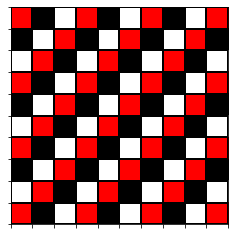

In [14]:
colour_tiles(place_tiles(10,10,df3),df3)

This works for a 10 x 10 grid of 1x1 tiles, need to add in functionality to create custom size grids and plot different sizes tiles. Good start!

# A random arrangement of tiles
---
I would like to add the option to create a random arrangement of tiles

In [0]:
#Build random option into the function
def place_tiles(area , tiles, type = 'ordered'):
    placement = []
    
    num_of_tiles_per_row = int(area[0] / tiles["Tile_Width"].mean())
    num_of_tiles_per_col = int(area[1] / tiles["Tile_Length"].mean())

    for c in range(num_of_tiles_per_col):
        cur_row_tiles = []

        for r in range(num_of_tiles_per_row):
            
            if c == 0 and r == 0:

              rand = rnd.randint(0,len(tiles.index) - 1)
              cur_row_tiles.append(tiles["Tile_Label"][rand])
              prev_tile = tiles["Tile_Label"][rand]
            
            elif type == 'ordered':

              next_tile_index = (tiles.index[tiles["Tile_Label"] == prev_tile][0] + 1) % len(tiles.index)
              next_tile = tiles["Tile_Label"][next_tile_index]
              cur_row_tiles.append(next_tile)
              prev_tile = next_tile
          
            elif type == 'random':

              rand = rnd.randint(0,len(tiles.index) - 1)
              cur_row_tiles.append(tiles["Tile_Label"][rand])

        placement.append(cur_row_tiles)
        prev_tile = cur_row_tiles[0]
    return placement

In [0]:
data = {'Tile_Label':  ['A','B','C','D'],
        'Tile_Length': [1,1,1,1],
        'Tile_Width': [1,1,1,1],
        'Tile_Colour':['black','white','red','green']}

df4 = pd.DataFrame (data, columns = ['Tile_Label','Tile_Length','Tile_Width','Tile_Colour'])

In [17]:
area = [10,10]
place_tiles(area,df4,'random')

[['A', 'B', 'D', 'B', 'C', 'A', 'B', 'A', 'B', 'C'],
 ['C', 'D', 'C', 'D', 'D', 'C', 'D', 'C', 'C', 'A'],
 ['A', 'A', 'D', 'C', 'B', 'B', 'D', 'D', 'C', 'C'],
 ['D', 'A', 'C', 'A', 'B', 'C', 'A', 'A', 'B', 'D'],
 ['B', 'D', 'B', 'A', 'B', 'A', 'D', 'D', 'A', 'D'],
 ['D', 'D', 'C', 'C', 'D', 'B', 'A', 'A', 'B', 'B'],
 ['D', 'A', 'B', 'D', 'D', 'A', 'C', 'B', 'B', 'D'],
 ['D', 'A', 'C', 'A', 'A', 'C', 'B', 'A', 'B', 'A'],
 ['D', 'A', 'B', 'D', 'B', 'B', 'B', 'A', 'C', 'B'],
 ['A', 'C', 'C', 'C', 'C', 'B', 'D', 'C', 'B', 'D']]

This works and is a little neater to use. Now to modify the colouring function to only take an area and dataframe of tiles as an arguement and test.

In [0]:
def colour_tiles(tiles, area, type = 'ordered'):

  #Create discrete colormap
  cmap = colors.ListedColormap(tiles["Tile_Colour"])
  bounds = tiles.index.to_list()
  bounds.append(len(tiles.index))
  norm = colors.BoundaryNorm(bounds, cmap.N)

  #Create a lookup dictionary to replace tile labels with numeric values
  lookup = dict(zip(tiles["Tile_Label"], tiles.index.to_list()))

  #Create the tile arrangement
  arrangement = place_tiles(area, tiles, type)

  #Replace the tile labels with numbers
  data = []

  for line in arrangement:
    n_line = (pd.Series(line)).map(lookup)
    data.append(list(n_line))

  #Create the plot
  fig, ax = plt.subplots()
  ax.imshow(data, cmap=cmap, norm=norm)

  #Draw gridlines
  ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)

  #Set plot area
  ax.set_xticks(np.arange(-0.5, area[0], 1));
  ax.set_yticks(np.arange(-0.5, area[1], 1));

  #Hide Tick Labels
  ax.set_xticklabels([]);
  ax.set_yticklabels([]);

  #Show plot
  plt.show()

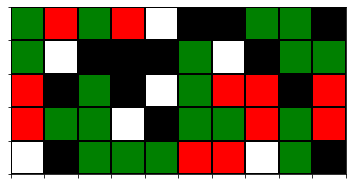

In [19]:
area = [10,5]
colour_tiles(df4,area,'random')

Let's try a larger area to see how it looks!

In [0]:
data = {'Tile_Label':  ['A','B','C','D'],
        'Tile_Length': [1,1,1,1],
        'Tile_Width': [1,1,1,1],
        'Tile_Colour':['black','white','brown','grey']}

df5 = pd.DataFrame (data, columns = ['Tile_Label','Tile_Length','Tile_Width','Tile_Colour'])

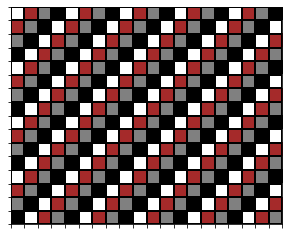

In [21]:
#Ordered
colour_tiles(df5,[20,16])

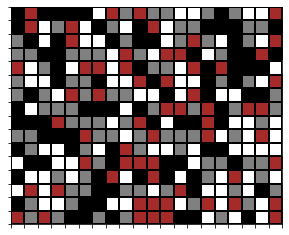

In [22]:
#random
colour_tiles(tiles = df5, area = [20,16], type = 'random')

Really happy with this!

Next challenges are:


*   Arrange tiles of varying sizes
*   Dealing with an invalid way to arrange tiles



# Tiles of varying sizes
---
In this section I'm aiming to add the ability for my functions to be able to deal with tiles of different sizes.

My idea is to keep the colour function and the format of the arrangement matrix the same but change the logic behind the matrix so that any tile larger than 1 x 1 fills an additional element of the matrix.

For this to work I need to refactor the function to look at the matrix as a whole rather than completing 1 line at a time.

**Tile Arrangement**

In [0]:
def place_tiles(area , tiles):
    
    placement = np.empty(shape=(area[1],area[0]), dtype = "str")

    for c in range(area[1]):

        for r in range(area[0]):
            
            if c == 0 and r == 0:
              
              #Decide which tile to place
              rand = rnd.randint(0,len(tiles.index) - 1)

              #Loop to place that tile label in neighbouring squares if it's larger than 1
              for l in range(tiles["Tile_Length"][rand]):
                
                for w in range(tiles["Tile_Width"][rand]):
                
                  placement[c + l][r + w] = tiles["Tile_Label"][rand]
  
            
            else:
              
              #Skip if position is already filled
              if placement[c][r] != '': continue

              #Filter to list of tiles to valid tiles that can be placed
              valid_tiles = tiles[(tiles["Tile_Width"] <= placement.shape[1] - r) & (tiles["Tile_Length"] <= placement.shape[0] - c)]

              #Find out how many empty spaces we have to use
              space = 0
              for item in placement[c][r:(area[0] + 1)]:
                if item == '': space += 1
                elif item != '': break
              
              #Filter valid tiles to those <= number of availabile spaces
              valid_tiles = valid_tiles[valid_tiles["Tile_Width"] <= space]

              #Filter out previous tiles if possible
              if valid_tiles.shape[0] > 1: 
                valid_tiles = valid_tiles[valid_tiles["Tile_Label"] != placement[c][r - 1]]
 
              #Choose one from list of valid
              next_tile = valid_tiles.sample(n = 1)
              
              for l in range(next_tile["Tile_Length"].to_numpy()[0]):
                
                for w in range(next_tile["Tile_Width"].to_numpy()[0]):
                
                  placement[c + l][r + w] = next_tile["Tile_Label"].to_numpy()[0]

    return placement

**Tile Colouring**

In [0]:
def colour_tiles(tiles, area):

  #Create discrete colormap
  cmap = colors.ListedColormap(tiles["Tile_Colour"])
  bounds = tiles.index.to_list()
  bounds.append(len(tiles.index))
  norm = colors.BoundaryNorm(bounds, cmap.N)

  #Create a lookup dictionary to replace tile labels with numeric values
  lookup = dict(zip(tiles["Tile_Label"], tiles.index.to_list()))

  #Create the tile arrangement
  arrangement = place_tiles(area, tiles)

  #Replace the tile labels with numbers
  data = []

  for line in arrangement:
    n_line = (pd.Series(line)).map(lookup)
    data.append(list(n_line))

  #Create the plot
  fig, ax = plt.subplots()
  ax.imshow(data, cmap=cmap, norm=norm)

  #Draw gridlines
  ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)

  #Set plot area
  ax.set_xticks(np.arange(-0.5, area[0], 1));
  ax.set_yticks(np.arange(-0.5, area[1], 1));

  #Hide Tick Labels
  ax.set_xticklabels([]);
  ax.set_yticklabels([]);

  #Show plot
  plt.show()

**Tile Data**

In [0]:
#Tile data of varying sizes to test
data = {'Tile_Label':  ['A','B','C','D'],
        'Tile_Length': [1,1,2,2],
        'Tile_Width': [1,2,1,2],
        'Tile_Colour':['black','white','brown','grey']}

df6 = pd.DataFrame (data, columns = ['Tile_Label','Tile_Length','Tile_Width','Tile_Colour'])

**Test**

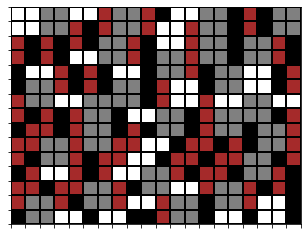

In [203]:
colour_tiles(area = [20,15], tiles= df6)

This works exactly as expected! 

This will solve any problem where there exists a 1x1 tile. 

A potential improvement will be to add a way for the function to deal with unsolvable problems and problems with a limited number of solutions.